In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
species_names = le.classes_
species_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df['species'].value_counts()  # labeled by alphabatical order

0    50
1    50
2    50
Name: species, dtype: int64

In [15]:
X = df.drop(columns = ['species'])
y = df['species']
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle = True, random_state = 69)

In [19]:
x_train.shape

(105, 4)

In [21]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
print(x_train[:1])
x_test = sc.transform(x_test) # we will not use fit as it is already used

    sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [22]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Set the default graph explicitly
tf.compat.v1.get_default_graph()

# Define your model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100

4/4 - 1s - loss: 1.1871 - accuracy: 0.2857 - 1s/epoch - 303ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1570 - accuracy: 0.3048 - 18ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1383 - accuracy: 0.3048 - 14ms/epoch - 4ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0522 - accuracy: 0.4286 - 13ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0307 - accuracy: 0.4381 - 14ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 1.0142 - accuracy: 0.4857 - 20ms/epoch - 5ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9540 - accuracy: 0.5143 - 2ms/epoch - 601us/step
Epoch 8/100
4/4 - 0s - loss: 0.8893 - accuracy: 0.7143 - 4ms/epoch - 1ms/step
Epoch 9/100
4/4 - 0s - loss: 0.9045 - accuracy: 0.6000 - 15ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8425 - accuracy: 0.6952 - 0s/epoch - 0s/step
Epoch 11/100
4/4 - 0s - loss: 0.8688 - accuracy: 0.6476 - 17ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.8029 - accuracy: 0.7714 - 0s/epoch - 0s/step
Epoch 13/100
4/4 - 0s - loss: 0.8128 - accuracy: 0.733

In [35]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 0s/step
[[9.9989760e-01 5.9423826e-05 4.2921714e-05]
 [3.3449605e-03 9.3483716e-01 6.1817881e-02]
 [9.9938428e-01 4.5116755e-04 1.6453696e-04]
 [5.2057352e-04 1.9006936e-02 9.8047251e-01]
 [9.9888271e-01 7.7621907e-04 3.4097742e-04]]


In [36]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [39]:
cm = confusion_matrix(y_test, prediction)

In [41]:
cm

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 16]], dtype=int64)

Text(50.72222222222221, 0.5, 'Actual')

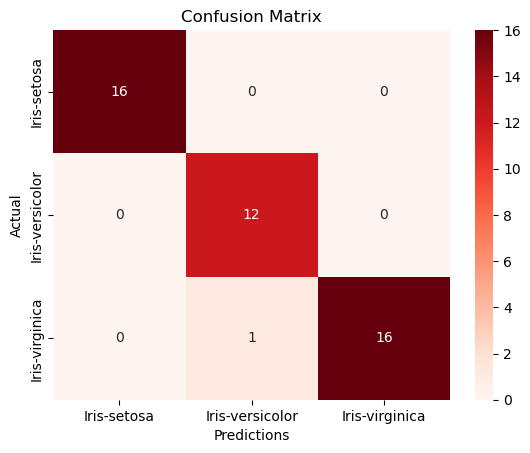

In [50]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_names, yticklabels=species_names)
ax.set_title("Confusion Matrix")
ax.set_xlabel('Predictions')
ax.set_ylabel('Actual')
